In [167]:
!pip install git+https://github.com/keras-team/keras-preprocessing.git
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Input, Flatten
from keras_preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import cv2 as cv
import os


  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-3bsw2ab1
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-3bsw2ab1
  Resolved https://github.com/keras-team/keras-preprocessing.git to commit 3e380065d4afc7347aaee8d89325a16b22158438
  Preparing metadata (setup.py) ... done


In [168]:
happy_path = '/kaggle/input/human-face-emotions/data/Happy'
sad_path = '/kaggle/input/human-face-emotions/data/Sad'
angry_path = '/kaggle/input/human-face-emotions/data/Angry'
SIZE = 64

In [169]:
def load_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        image = cv.imread(img_path,1)
#         print(image.shape)
        if image is None:
          continue
        image = cv.resize(image, (SIZE, SIZE))
        images.append(image)
        labels.append(label)
    return images, labels

In [170]:
happy_images, happy_labels = load_images(happy_path, 0)
sad_images, sad_labels = load_images(sad_path, 1)
angry_images, angry_labels = load_images(angry_path, 2)

In [171]:
print(len(angry_images))
print(len(sad_labels))
print(len(angry_labels))

86
78
86


In [172]:
images = np.concatenate([happy_images, sad_images, angry_images])
labels = np.concatenate([happy_labels, sad_labels, angry_labels])

In [173]:
print(images.shape)
print(labels.shape)

(264, 64, 64, 3)
(264,)


In [174]:
labels = to_categorical(labels, 3)

In [175]:
print(labels.shape)

(264, 3)


In [176]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [177]:
print(len(X_train))
print(len(X_test))

211
53


In [178]:
X_test1 = X_test
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [179]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [180]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 128)       

In [181]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [191]:
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
43/43 [==============================] - 0s 4ms/step - loss: 1.0628 - accuracy: 0.4076
Epoch 2/100
43/43 [==============================] - 0s 5ms/step - loss: 1.0685 - accuracy: 0.4123
Epoch 3/100
43/43 [==============================] - 0s 6ms/step - loss: 1.0585 - accuracy: 0.4123
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 1.0639 - accuracy: 0.4218
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 1.1277 - accuracy: 0.4171
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 1.0599 - accuracy: 0.4171
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 1.0728 - accuracy: 0.4360
Epoch 8/100
43/43 [==============================] - 0s 4ms/step - loss: 1.0762 - accuracy: 0.4313
Epoch 9/100
43/43 [==============================] - 0s 4ms/step - loss: 1.4035 - accuracy: 0.4313
Epoch 10/100
43/43 [==============================] - 0s 4ms/step - loss: 1.2554 - accuracy: 0.4028
Epoch 11/

In [192]:
prediction_on_test_data = model.evaluate(X_test, y_test)
print("Loss: ", prediction_on_test_data[0])
print("Accuracy: ", np.round(prediction_on_test_data[1] * 100,1))

2/2 [==============================] - 0s 9ms/step - loss: 5.8283 - accuracy: 0.3019
Loss:  5.828301429748535
Accuracy:  30.2


In [193]:
emoji = ["😊" , "😔" , "👿"]

In [194]:
def plot_images(image,labels,predicted):
    plt.figure(figsize=(2,2))
    plt.subplot(1,1,1)
    print(emoji[predicted])
    print(emoji[np.argmax(labels)])
#     plt.title(emoji[predicted], color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.show()

1/1 [==============================] - 0s 18ms/step
👿
😊


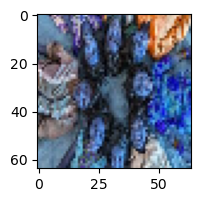

1/1 [==============================] - 0s 19ms/step
👿
😊


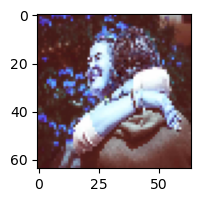

1/1 [==============================] - 0s 19ms/step
😊
😊


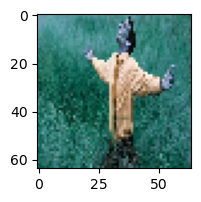

1/1 [==============================] - 0s 23ms/step
😔
😊


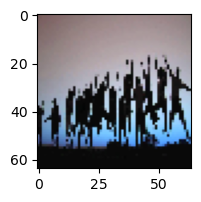

1/1 [==============================] - 0s 20ms/step
👿
😔


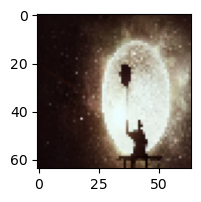

1/1 [==============================] - 0s 19ms/step
😔
😔


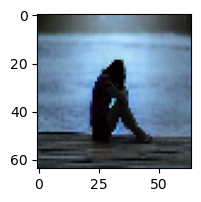

1/1 [==============================] - 0s 20ms/step
😊
😊


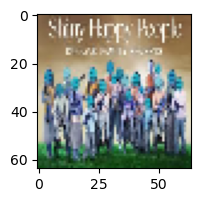

1/1 [==============================] - 0s 19ms/step
😔
😔


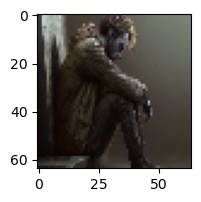

1/1 [==============================] - 0s 19ms/step
😊
😔


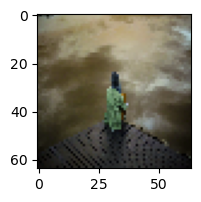

1/1 [==============================] - 0s 19ms/step
😊
😔


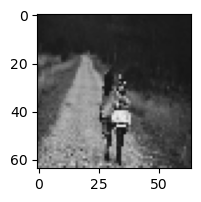

In [195]:
for i in range(20,30,1):
#     new_image_resized = resize(np.array(X_test[i]), (64, 64, 3))
#     print(X_test[i].shape)
    image = cv.resize(X_test1[i], (SIZE, SIZE))
#     print(image.shape)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
#     image = np.resize(np.array(X_test[i]), (64, 64, 3))
    prediction = np.argmax(model.predict(image))

    plot_images(X_test1[i], y_test[i], prediction);
    